In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
print (df.shape)

(42000, 785)


In [ ]:
print (df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = df.values

In [ ]:
print(data.shape)

(42000, 785)


In [ ]:
print (type (data))

<class 'numpy.ndarray'>


In [ ]:
# label is y
# pixels are x

In [ ]:
x = data [: , 1:]
y = data [: , 0]

In [ ]:
print (x.shape , y.shape)

(42000, 784) (42000,)


In [ ]:
print (x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print (y)

[1 0 1 ... 7 6 9]


In [ ]:
# train test split
split =int(0.8 * x.shape[0])

In [ ]:
split

33600

In [ ]:
x_train = x[:split ,:]
y_train = y[:split]


In [ ]:
x_test = x[split: , :]
y_test = y[split:]

In [ ]:
print (x_train.shape ,y_train.shape)

(33600, 784) (33600,)


In [ ]:
print (x_test.shape,y_test.shape )

(8400, 784) (8400,)


In [ ]:
# Visualize some samples

In [ ]:
def DrawImage (sample):

  #reshape that image
  img = sample.reshape((28,28))
  plt.imshow(img,cmap='gray' )
  plt.show()

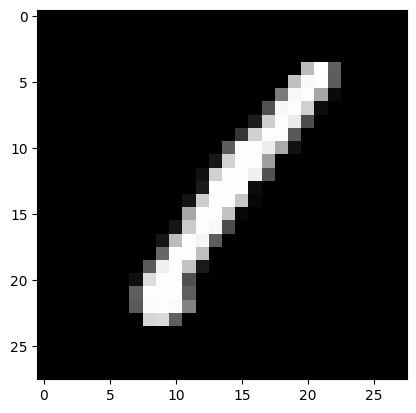

1


In [ ]:
DrawImage(x_train[0])
print(y_train[0])


In [ ]:
# Distance Formula Between Two NumpY Arrays - Euclidean distance
def distance (x1 , x2) :
  return np.sqrt (sum((x1 - x2)**2))

In [ ]:
# KNN ALGO

def knn (x , y , querypoint , k = 5 ) :

   # Pick K Nearest Neighbours

   values = []

   #for every point in the x

   for i in range (x.shape[0]) :

    #compute distance
    d = distance(querypoint , x[i])
    values.append ((d , y[i]))

  # print(values)

   # Sort The array and find K nearest points
   values = values [:k]

   #Majority Vote
   values = np.array(values)
   new_values = np.unique(values[: , 1], return_counts = True)
   print ( new_values)


   #index of the maximum count
   index = new_values[1].argmax()

   #map this index withmy data
   pred =  new_values[0][index]

   return pred



In [ ]:
# make predictions over test images

In [ ]:
pred = knn (x_train , y_train, x_test[25])

(array([0., 1., 4.]), array([2, 2, 1]))


In [ ]:
pred

0.0

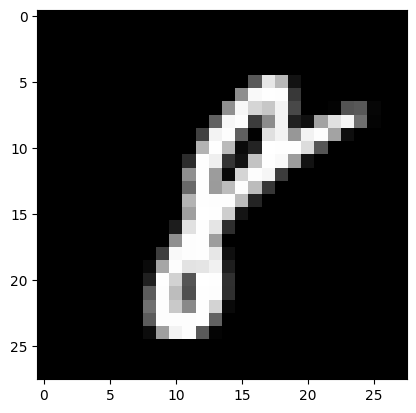

In [ ]:
DrawImage(x_test[25])

In [ ]:
print(y_test[25])

8
